In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Data set/Analysis tender1.xlsx')
df.head(10)


,S.no,Tender no,Rating,Department,Location,Qty,Estimated cost,Published Date,Due Date,Eligible (Yes/No),Cause of Not Eligible,Skyline L1
0,1,GEM/2023/B/3925568,25kva,UP,Medical Health And Family Welfare,97,>10 Lakhs,07.09.2023,07.11.2023,Yes,NaN,Submitted
1,2,GEM/2023/B/3975505,30kva,Department Of Posts,Shillong,1,<10 Lakhs,27.09.2023,10.11.2023,Yes,NaN,Submitted
2,3,GEM/2023/B/3661097,100kva,Central Reserve Police Force,Manipur,1,<10 Lakhs,02.08.2023,NaN,No,Air cooled,Submitted
3,4,GEM/2023/B/3856322,82.5kva,Public Works Department,West Bengal,1,<10 Lakhs,22.08.2023,NaN,No,PWD west bengal,Submitted
4,5,GEM/2023/B/4042580,125kva,Border Security Force,Gurdaspur,1,>10 Lakhs,05.10.2023,02.11.2023,Yes,NaN,Submitted
5,6,GEM/2023/B/3925654,7.5kva,Border Security Force (bsf),Imphal,1,<10 Lakhs,05.10.2023,03.11.2023,Yes,NaN,Submitted
6,7,GEM/2023/B/4085175,125kva,Pwd Electrical,West Bengal,1,>10 Lakhs,13.10.2023,06.11.2023,No,12 volt volatge,Submitted
7,8,GEM/2023/B/4073569,25kva,South Central Railway,Secunderabad,2,<10 Lakhs,11.10.2023,02.11.2023,Yes,NaN,Submitted
8,9,GEM/2023/B/4074369,10kva,Labour And Employment Department,Gujarat,1,<10 Lakhs,12.10.2023,02.11.2023,Yes,NaN,Submitted
9,10,GEM/2023/B/4085732,250kva,North Western Railway,Multi location,7,>10 Lakhs,13.10.2023,03.11.2023,Yes,1 Battery asked for 24 volt,Submitted


In [3]:
df.isnull().sum()

S.no                       0
Tender no                  0
Rating                     0
Department                 0
Location                   2
Qty                        0
Estimated cost             0
Published Date             0
Due Date                   2
Eligible (Yes/No)          0
Cause of Not Eligible     28
Skyline L1                 0
dtype: int64

In [4]:
df=df.fillna('Other')
df.head(2)


,S.no,Tender no,Rating,Department,Location,Qty,Estimated cost,Published Date,Due Date,Eligible (Yes/No),Cause of Not Eligible,Skyline L1
0,1,GEM/2023/B/3925568,25kva,UP,Medical Health And Family Welfare,97,>10 Lakhs,07.09.2023,07.11.2023,Yes,Other,Submitted
1,2,GEM/2023/B/3975505,30kva,Department Of Posts,Shillong,1,<10 Lakhs,27.09.2023,10.11.2023,Yes,Other,Submitted


In [5]:
df.isnull().sum()

S.no                      0
Tender no                 0
Rating                    0
Department                0
Location                  0
Qty                       0
Estimated cost            0
Published Date            0
Due Date                  0
Eligible (Yes/No)         0
Cause of Not Eligible     0
Skyline L1                0
dtype: int64

***Analysis of Data***

**No of Tender Vs Eligiblity**

In [6]:
import matplotlib
print(matplotlib.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


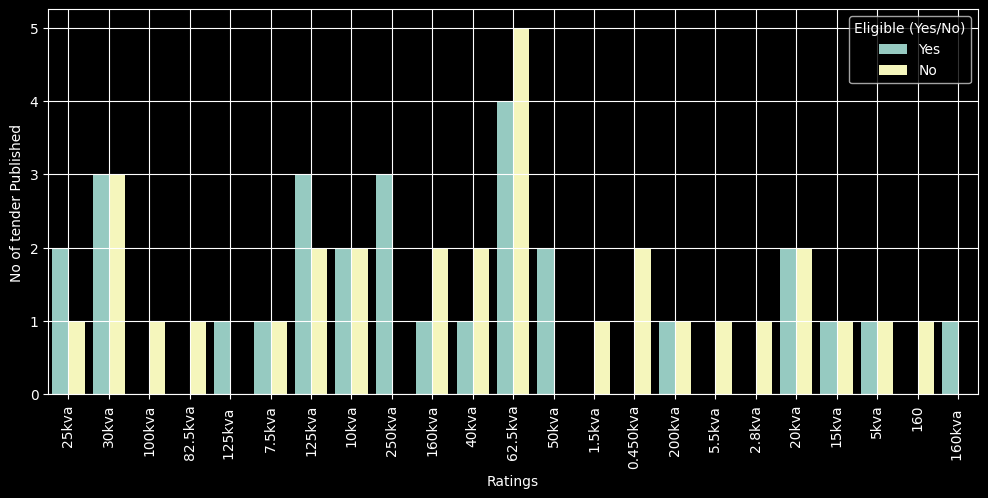

In [7]:

#sns.set(font_scale=1.25)  # Its permanently changes the font size of all details of all below plots

from matplotlib import style
style.use('dark_background')     # Its also chnages permanent background of all below plots

plt.figure(figsize=(12,5))

sns.countplot(x='Rating',hue='Eligible (Yes/No)',data=df)
plt.ylabel('No of tender Published')
plt.xlabel('Ratings')
plt.xticks(rotation=90)
plt.grid()
plt.show()

**TOP 10 RATINGS TENDER PUBLISHED**

In [8]:

Top_ratings=df['Rating'].value_counts().reset_index()
Top_ratings.columns=['Ratings','No_of_tender_publised']
Top_ratings.sort_values(by='No_of_tender_publised',axis=0)
Top_ratings=Top_ratings.head(10)
Top_ratings

,Ratings,No_of_tender_publised
0,62.5kva,9
1,30kva,6
2,125kva,5
3,20kva,4
4,10kva,4
5,250kva,3
6,40kva,3
7,160kva,3
8,25kva,3
9,7.5kva,2


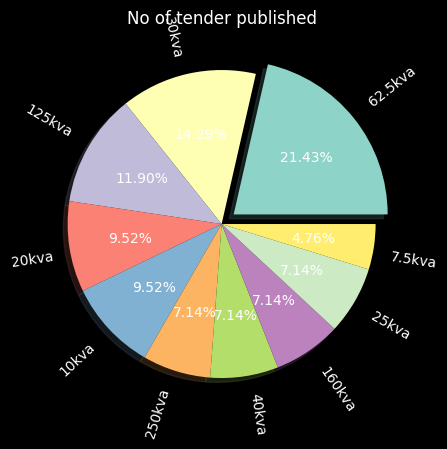

In [9]:
plt.figure(figsize=(5,5))

plt.pie(Top_ratings['No_of_tender_publised'],labels=Top_ratings['Ratings'],rotatelabels='Yes',autopct='%1.2f%%',shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0],radius=1)
plt.title('No of tender published')
plt.show()

**No. of tender submited /not submited**

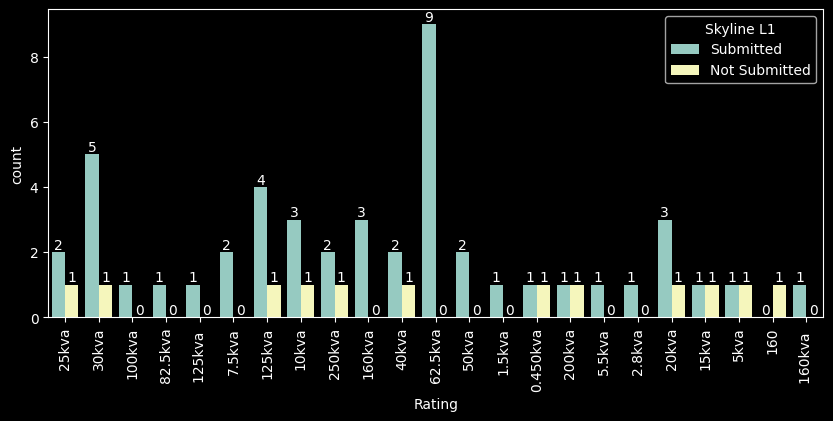

In [10]:
# total tedner no  vs submited /not submited/other

plt.figure(figsize=(10,4))
ax=sns.countplot(x='Rating',hue='Skyline L1',data=df)
plt.xticks(rotation=90)
for i in ax.containers:
     ax.bar_label(i,)
plt.show()

 **Total Quantity of Ratings**

In [11]:
tender_Qty=df.groupby('Rating')['Qty'].sum().reset_index()

tender_Qty

,Rating,Qty
0,160,1
1,0.450kva,3
2,1.5kva,13
3,100kva,1
4,10kva,6
5,125kva,6
6,125kva,1
7,15kva,2
8,160kva,6
9,160kva,3


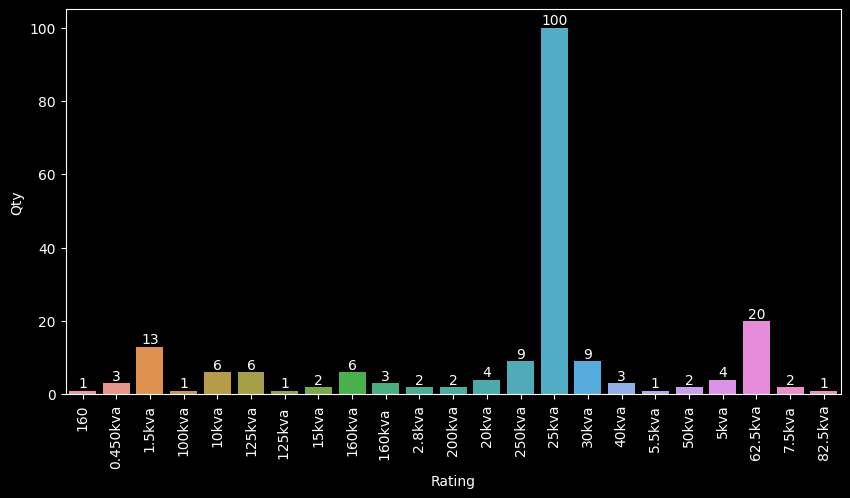

In [12]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Rating',y='Qty',data=tender_Qty)
for i in ax.containers:
     ax.bar_label(i,)
plt.xticks(rotation=90)
#plt.grid()
plt.show()

In [13]:
## Total qty rating wise with hue=Skyline L1

In [14]:
df.head(2)

,S.no,Tender no,Rating,Department,Location,Qty,Estimated cost,Published Date,Due Date,Eligible (Yes/No),Cause of Not Eligible,Skyline L1
0,1,GEM/2023/B/3925568,25kva,UP,Medical Health And Family Welfare,97,>10 Lakhs,07.09.2023,07.11.2023,Yes,Other,Submitted
1,2,GEM/2023/B/3975505,30kva,Department Of Posts,Shillong,1,<10 Lakhs,27.09.2023,10.11.2023,Yes,Other,Submitted


In [15]:
# # Not correct plot
# plt.figure(figsize=(10,5))
# plt.xticks(rotation=90)

# sns.barplot(x='Rating',y='Qty',hue='Skyline L1',data=df)

In [16]:
Tender_participate=df[df['Skyline L1']=='Submitted']
Tender_participate.head(2)

,S.no,Tender no,Rating,Department,Location,Qty,Estimated cost,Published Date,Due Date,Eligible (Yes/No),Cause of Not Eligible,Skyline L1
0,1,GEM/2023/B/3925568,25kva,UP,Medical Health And Family Welfare,97,>10 Lakhs,07.09.2023,07.11.2023,Yes,Other,Submitted
1,2,GEM/2023/B/3975505,30kva,Department Of Posts,Shillong,1,<10 Lakhs,27.09.2023,10.11.2023,Yes,Other,Submitted


<ipython-input-17-d452d6fd546e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Qty'])
<ipython-input-17-d452d6fd546e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Tender_participate['Qty'])


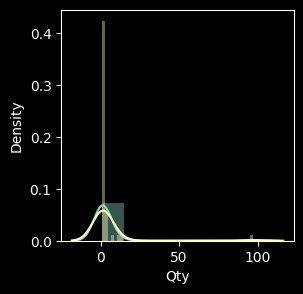

In [17]:
                                                                            # Distribution plot

plt.figure(figsize=(3,3))
sns.distplot(df['Qty'])
sns.distplot(Tender_participate['Qty'])
plt.show()

#** Heat map for Total Quantity Vs Ratings**

In [18]:
heat_dataframe1=df.groupby('Rating')['Qty'].sum().reset_index()
heat_dataframe1

,Rating,Qty
0,160,1
1,0.450kva,3
2,1.5kva,13
3,100kva,1
4,10kva,6
5,125kva,6
6,125kva,1
7,15kva,2
8,160kva,6
9,160kva,3


In [19]:
heat_dataframe1=pd.crosstab(heat_dataframe1['Rating'],heat_dataframe1['Qty'])
heat_dataframe1

Qty,1,2,3,4,6,9,13,20,100
Rating,,,,,,,,,
160,1,0,0,0,0,0,0,0,0
0.450kva,0,0,1,0,0,0,0,0,0
1.5kva,0,0,0,0,0,0,1,0,0
100kva,1,0,0,0,0,0,0,0,0
10kva,0,0,0,0,1,0,0,0,0
125kva,0,0,0,0,1,0,0,0,0
125kva,1,0,0,0,0,0,0,0,0
15kva,0,1,0,0,0,0,0,0,0
160kva,0,0,0,0,1,0,0,0,0


<Axes: xlabel='Qty', ylabel='Rating'>

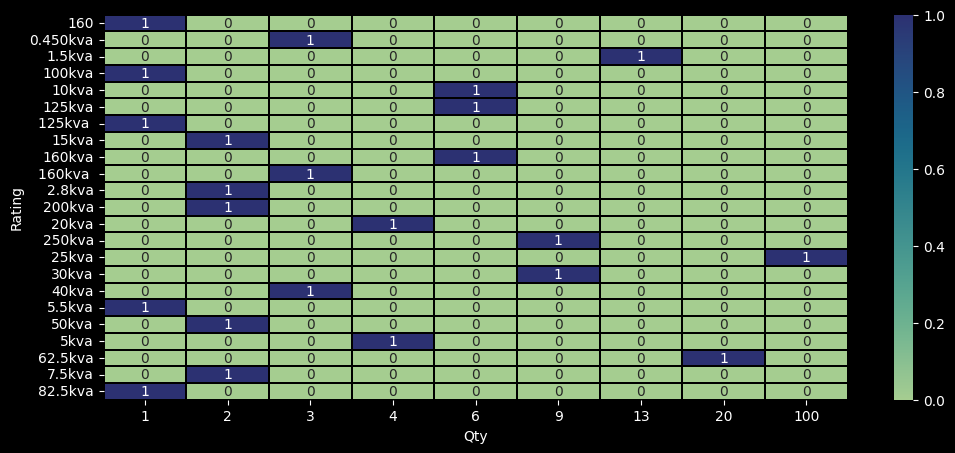

In [20]:
plt.figure(figsize=(12,5))
sns.heatmap(heat_dataframe1,annot=True,linewidths=0.025,cmap="crest",linecolor='black')

**Heat Map for Individual Qty Rating wise***




In [21]:
heat_dataframe=pd.crosstab(df['Rating'],df['Qty'])
heat_dataframe



Qty,1,2,3,4,7,12,13,97
Rating,,,,,,,,
160,1,0,0,0,0,0,0,0
0.450kva,1,1,0,0,0,0,0,0
1.5kva,0,0,0,0,0,0,1,0
100kva,1,0,0,0,0,0,0,0
10kva,3,0,1,0,0,0,0,0
125kva,4,1,0,0,0,0,0,0
125kva,1,0,0,0,0,0,0,0
15kva,2,0,0,0,0,0,0,0
160kva,1,1,1,0,0,0,0,0


<Axes: xlabel='Qty', ylabel='Rating'>

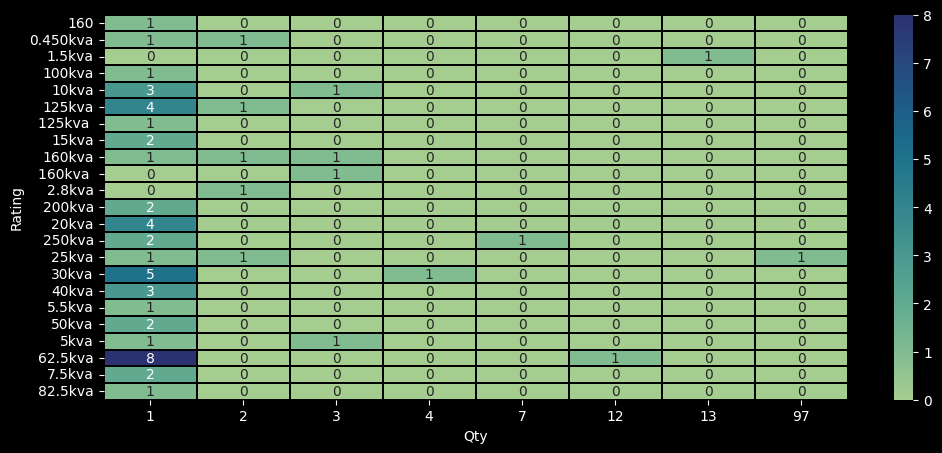

In [22]:
plt.figure(figsize=(12,5))
sns.heatmap(heat_dataframe,annot=True,linewidths=0.025,cmap="crest",linecolor='black')

**Heat Map for 'Ratings' vs 	'Skyline L'1  vs  'Qty'**





In [23]:
## heatmap

# https://www.statology.org/valueerror-index-contains-duplicate-entries-cannot-reshape/

In [24]:
df[['Rating','Skyline L1','Qty']].head(5)

,Rating,Skyline L1,Qty
0,25kva,Submitted,97
1,30kva,Submitted,1
2,100kva,Submitted,1
3,82.5kva,Submitted,1
4,125kva,Submitted,1


In [25]:
table = df.pivot_table(index="Rating", columns="Skyline L1", values="Qty",aggfunc='count')

table=table.fillna(0)


<Axes: xlabel='Skyline L1', ylabel='Rating'>

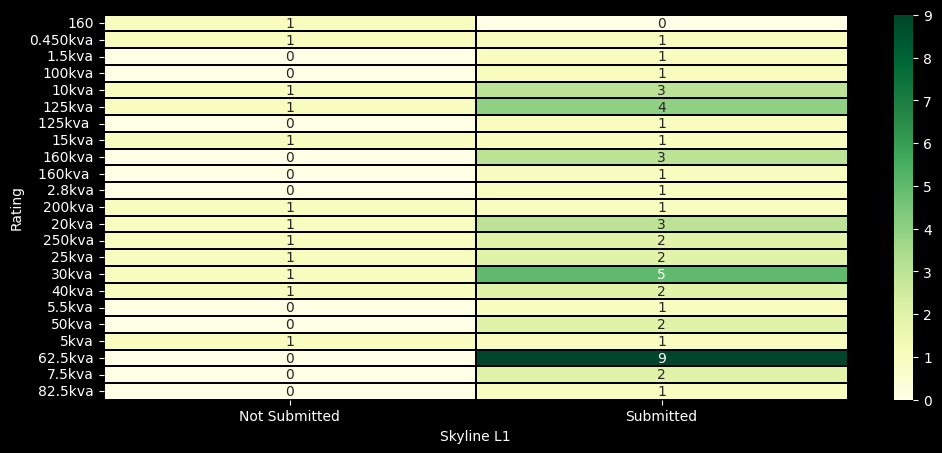

In [26]:
plt.figure(figsize=(12,5))
sns.heatmap(table,annot=True,linewidths=0.025,cmap="YlGn",linecolor='black')

In [27]:
df['Due Date']=df['Due Date'].str.replace('Other','11.11.2023')
df.head(2)

,S.no,Tender no,Rating,Department,Location,Qty,Estimated cost,Published Date,Due Date,Eligible (Yes/No),Cause of Not Eligible,Skyline L1
0,1,GEM/2023/B/3925568,25kva,UP,Medical Health And Family Welfare,97,>10 Lakhs,07.09.2023,07.11.2023,Yes,Other,Submitted
1,2,GEM/2023/B/3975505,30kva,Department Of Posts,Shillong,1,<10 Lakhs,27.09.2023,10.11.2023,Yes,Other,Submitted


**No. of Tender in Day wise in a Month**

In [28]:
# # problem in reterive day from date

# df['Due Date']=pd.to_datetime(df['Due Date'])   # converto datetime format

# df['Day']=df['Due Date'].apply(lambda x:x.day)

# df.head(2)

In [29]:
df['Due Date']=pd.to_datetime(df['Due Date'])   # converto datetime format

df['Due Date']=df['Due Date'].dt.strftime('%d/%m/%Y')  # use to change the date format but it convert into string format

df['Due Date']=pd.to_datetime(df['Due Date'])     # use to change the string format to date fomrat again

df['Day']=df['Due Date'].apply(lambda x:x.day)

df.head(2)

<ipython-input-29-4ffcd84942c0>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Due Date']=pd.to_datetime(df['Due Date'])   # converto datetime format
<ipython-input-29-4ffcd84942c0>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Due Date']=pd.to_datetime(df['Due Date'])     # use to change the string format to date fomrat again


,S.no,Tender no,Rating,Department,Location,Qty,Estimated cost,Published Date,Due Date,Eligible (Yes/No),Cause of Not Eligible,Skyline L1,Day
0,1,GEM/2023/B/3925568,25kva,UP,Medical Health And Family Welfare,97,>10 Lakhs,07.09.2023,2023-11-07,Yes,Other,Submitted,7
1,2,GEM/2023/B/3975505,30kva,Department Of Posts,Shillong,1,<10 Lakhs,27.09.2023,2023-11-10,Yes,Other,Submitted,10


In [30]:
Tender_on_day=df.groupby('Day')['Rating'].count().reset_index()
Tender_on_day.columns=['Day','No_of_tender']
Tender_on_day.head(5)

,Day,No_of_tender
0,1,3
1,2,5
2,3,3
3,4,4
4,5,1


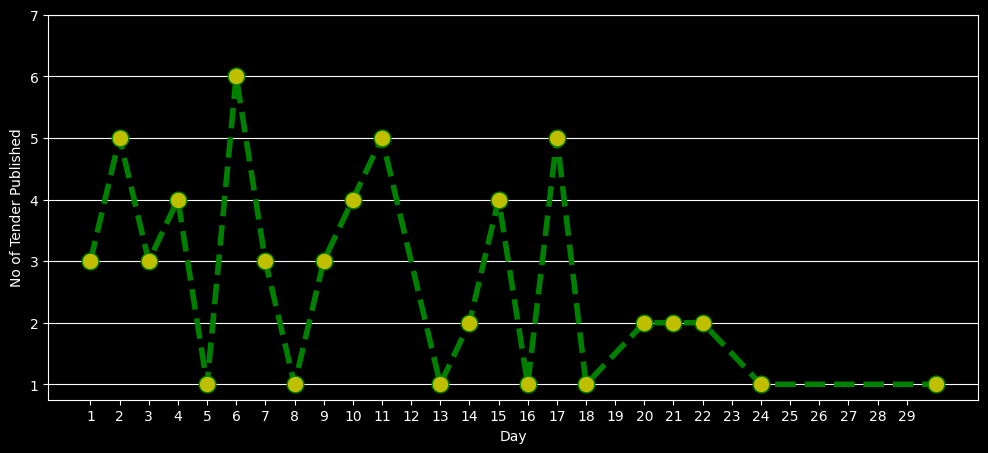

In [31]:
# from matplotlib import style
# style.use('dark_background')




plt.figure(figsize=(12,5))
#sns.lineplot(x='Day',y='No_of_tender',data=Tender_on_day,'bo--')
plt.plot(Tender_on_day['Day'],Tender_on_day['No_of_tender'],'go--',linewidth=4,ms=12,mfc = 'y')

plt.xticks(np.arange(1,30,1))
plt.yticks(np.arange(1,8,1))

plt.xlabel('Day')
# ax = plt.axes()
# ax.set_facecolor("green")

plt.ylabel('No of Tender Published')

plt.grid(axis='y')



plt.show()

**Top 5 Department have highest no of tender & Qty**

In [32]:
### Top 1o Departemnt have highst no of tender

In [33]:
df.head(2)

,S.no,Tender no,Rating,Department,Location,Qty,Estimated cost,Published Date,Due Date,Eligible (Yes/No),Cause of Not Eligible,Skyline L1,Day
0,1,GEM/2023/B/3925568,25kva,UP,Medical Health And Family Welfare,97,>10 Lakhs,07.09.2023,2023-11-07,Yes,Other,Submitted,7
1,2,GEM/2023/B/3975505,30kva,Department Of Posts,Shillong,1,<10 Lakhs,27.09.2023,2023-11-10,Yes,Other,Submitted,10


In [34]:
Department=df.groupby('Department').aggregate({'Published Date':'count','Qty':'sum'})
Department=Department.sort_values(by=['Published Date','Qty'],ascending=False).reset_index()
Department.columns=['Department','No_of_tender_published','Qty']
Department=Department.head(10)
Department

,Department,No_of_tender_published,Qty
0,North Western Railway,4,14
1,Ministry Of Environment Forest,4,4
2,Office Of Principal Chief,3,3
3,South East Central Railway,2,14
4,Southern Railway,2,4
5,Border Security Force,2,2
6,Border Security Force (bsf),2,2
7,Hindustan Petroleum,2,2
8,Indian Army,2,2
9,UP,1,97


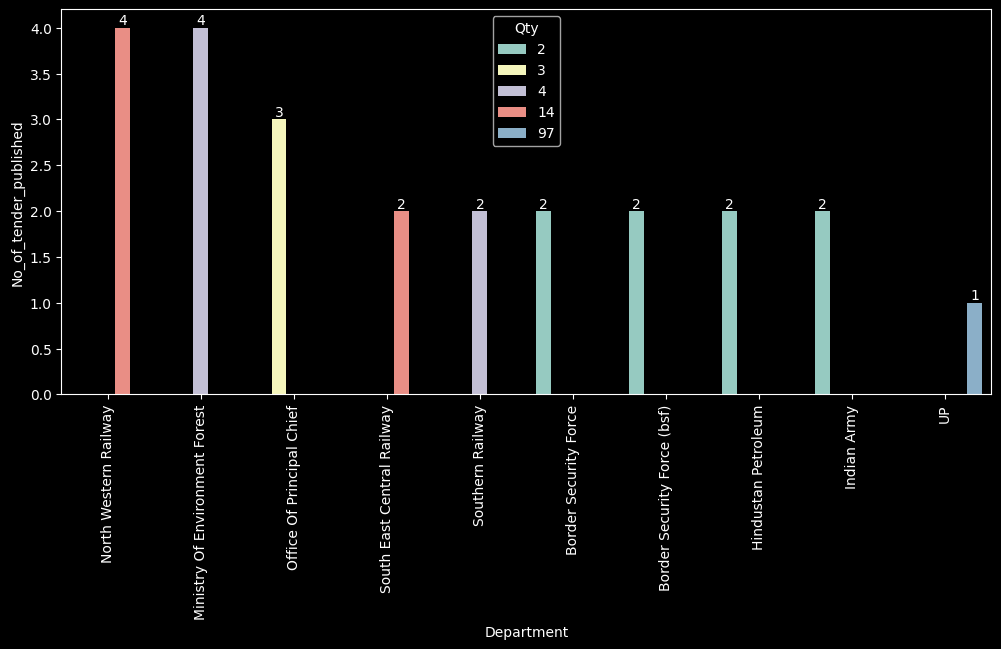

In [35]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)

from matplotlib import style


#sns.set(font_scale=2)
ax=sns.barplot(x='Department',y='No_of_tender_published',hue='Qty',data=Department)

for i in ax.containers:
     ax.bar_label(i,)

plt.show()

# Top 10 Reasons for not Eligible

In [36]:
Data_Not_Eligible=df['Cause of Not Eligible '].value_counts().reset_index()
Data_Not_Eligible.columns=['Reasons_NotEligible','Count']
Data_Not_Eligible=Data_Not_Eligible.head(10)
Data_Not_Eligible

,Reasons_NotEligible,Count
0,Other,28
1,Andaman location,5
2,PAC,5
3,Petrol,3
4,Other makes,2
5,Other make,2
6,Air Cooled,2
7,"specs not match (high HP,Air cooled,high cc)",1
8,Other brands,1
9,"Petrol start,",1


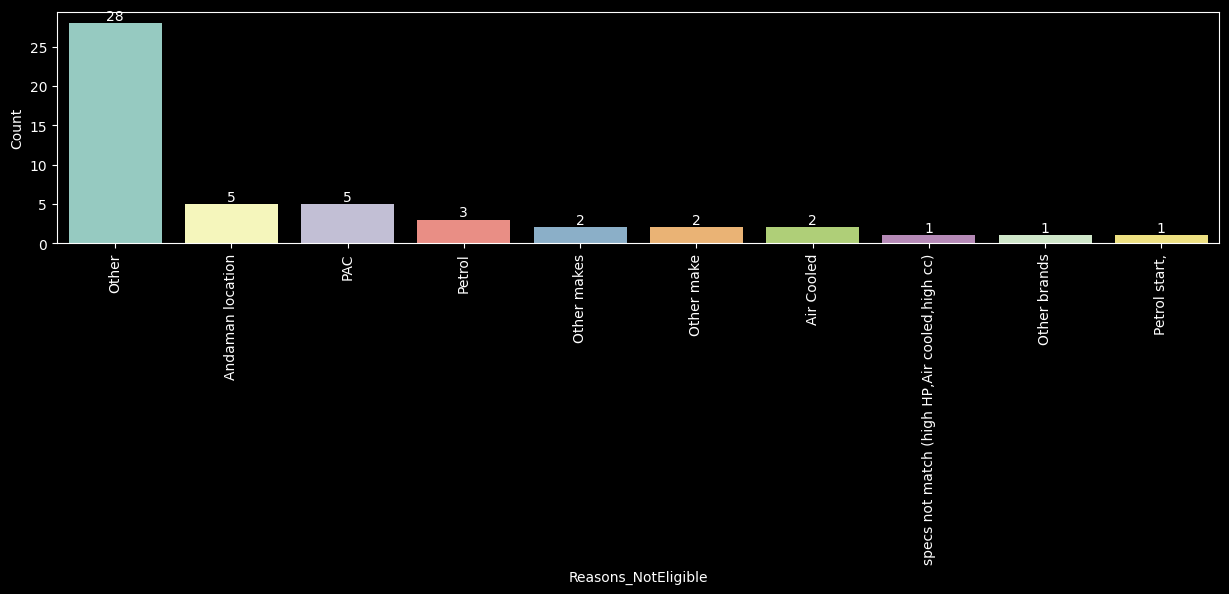

In [37]:
plt.figure(figsize=(15,3))
plt.xticks(rotation=90)

ax=sns.barplot(x='Reasons_NotEligible',y='Count',data=Data_Not_Eligible)
for i in ax.containers:
     ax.bar_label(i,)
plt.show()

In [38]:
###########

In [39]:
df.head(2)

,S.no,Tender no,Rating,Department,Location,Qty,Estimated cost,Published Date,Due Date,Eligible (Yes/No),Cause of Not Eligible,Skyline L1,Day
0,1,GEM/2023/B/3925568,25kva,UP,Medical Health And Family Welfare,97,>10 Lakhs,07.09.2023,2023-11-07,Yes,Other,Submitted,7
1,2,GEM/2023/B/3975505,30kva,Department Of Posts,Shillong,1,<10 Lakhs,27.09.2023,2023-11-10,Yes,Other,Submitted,10


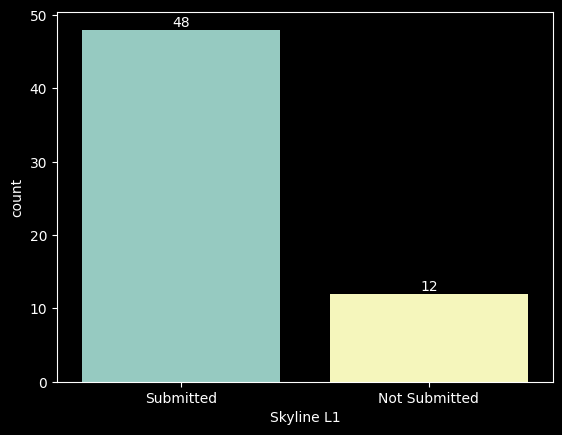

In [40]:

ax=sns.countplot(x='Skyline L1',data=df)
for i in ax.containers:
     ax.bar_label(i,)
plt.show()


In [41]:
#$###

In [42]:
x1=pd.crosstab(df['Rating'],df['Skyline L1']).apply(lambda x: x/x.sum(),axis=1)
x1

Skyline L1,Not Submitted,Submitted
Rating,,
160,1.000000,0.000000
0.450kva,0.500000,0.500000
1.5kva,0.000000,1.000000
100kva,0.000000,1.000000
10kva,0.250000,0.750000
125kva,0.200000,0.800000
125kva,0.000000,1.000000
15kva,0.500000,0.500000
160kva,0.000000,1.000000


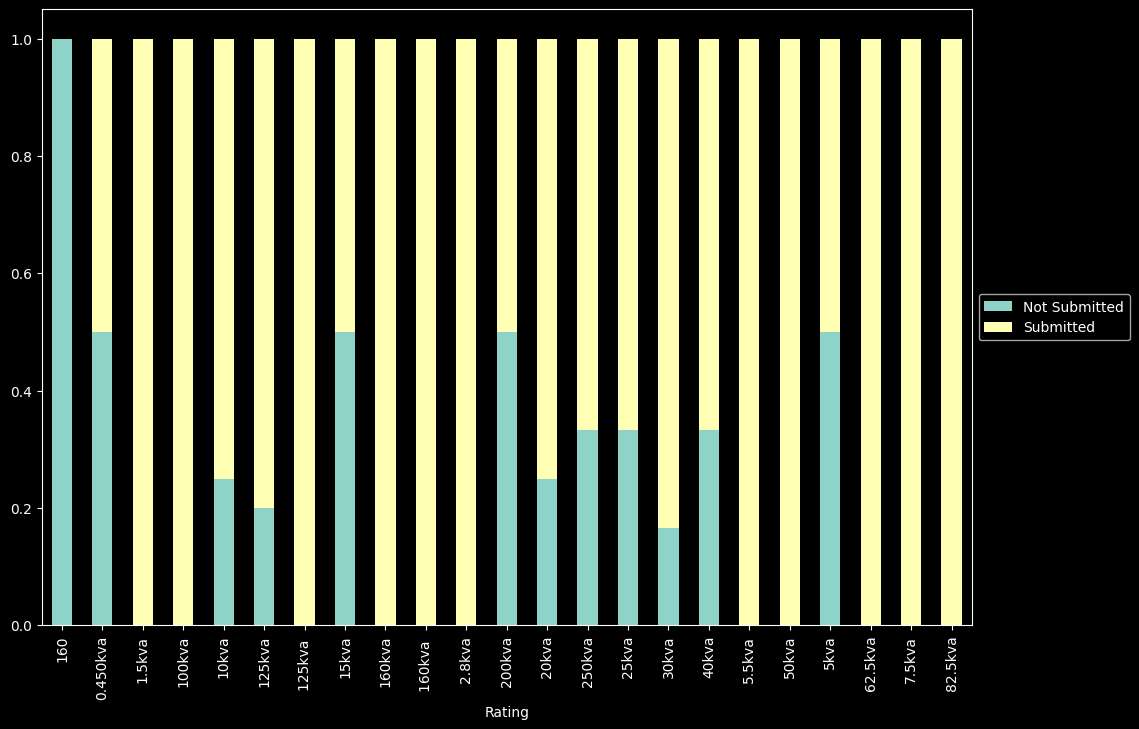

In [43]:
x1.plot(kind='bar', stacked=True, figsize=(12,8))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()